In [182]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats 
%matplotlib inline
import random

In [196]:
def sigmoid(z):
    return 1./(1+np.exp(-z))
def der_sigmoid(z):
    return (1./(1+np.exp(-z)))*(1-(1./(1+np.exp(-z))))

In [197]:


def diff_log_loss(t, y):
    
    return np.sum(-t/y +(1-t)/(1-y), keepdims=True)
def log_loss(t, y):
    return np.sum((-t*np.log(y) - (1 - t) * (np.log(1 - y))), keepdims=True).flatten()


In [204]:
class Layer: #слой реализован в виде класса
  
    
    def __init__(self, n_inp, n_out, lr=0.1):
        self.shape = (n_inp, n_out) #залетают входящие и выходящие значения
        self.lr = lr #шаг обучения
        self.w = np.zeros(self.shape, dtype=np.float32) #веса в начале заданы нулями
        self.b = np.zeros((1, n_out), dtype=np.float32) #смещения в начале заданы нулями
        self._clear_grads() #проход обычного градиентного спуска

    def _clear_grads(self): #градиентный спуск
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_w = None
        self.d_b = None

    def __call__(self, x): #вызов класса
        if len(x.shape) == 1: #если входящие значения одноразмерны - сменить размерность
            x = x.reshape(1, -1)
        self.inp = x #задаем входные значения
        self.activations = sigmoid(x.astype(np.float64).dot(self.w) + self.b) #запуск функции с функцией активации
        return self.activations

    def backward(self, grad): # обратный проход
        self.d_sigma = self.activations * (1 - self.activations) #производная функции ошибки 
        self.d_w = self.grad_w(grad)
        self.d_b = self.grad_b(grad)
        return self.grad_x(grad)

    def grad_w(self, grad):
        return grad * self.inp.T * self.d_sigma

    def grad_b(self, grad):
        return grad * self.d_sigma

    def grad_x(self, grad):
        return self.w.dot(grad) * self.d_sigma

    def step(self):
        self.w -= self.d_w * self.lr
        self.b -= self.d_b * self.lr
        self._clear_grads()
        #return(self.w, self.b)


In [205]:

l1 = Layer(1, 1) #слой1 
l2 = Layer(1,1) #слой2


In [206]:
mu_0 = np.random.normal(1.5, 1.0, (2,10000))
mu_1 = np.random.normal(3.5, 1.0, (2,10000))

In [207]:
list_of_distr = [1, 0]
list_of_distr

[1, 0]

In [211]:

for i in range(10000):
    
    t = random.choice(list_of_distr)
    if t == 1:
        x = np.random.normal(1.5, 1.0, (1,1))
    else:
        x = np.random.normal(3.5, 1.0, (1,1))
    y = l1(x.T)
    d_y = diff_log_loss(t, y)
        #print(d_y)
    l1.backward(d_y)
    l1.step()
print(log_loss(t,y))

[0.00243639]


In [212]:

for i in range(10000):
    
    t = random.choice(list_of_distr)
    if t == 1:
        x = np.random.normal(1.5, 1.0, (1,1))
    else:
        x = np.random.normal(-1.5, 1.0, (1,1))
    y1 = l1(x)
    y2 = l2(y1)
    d_y2 = diff_log_loss(t, y2)
    d_y1 = diff_log_loss(y2, y1)
    l2.backward(d_y2)
    l1.backward(d_y1)
    l2.step()
    l1.step()
print(d_y1)

[[0.10135374]]


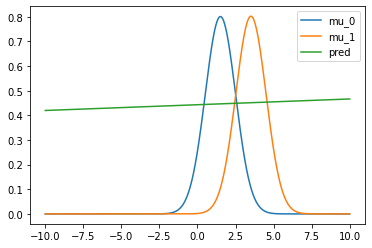

In [213]:
x_scale = np.linspace(-10, 10, 5000)
predictor = []
for line in x_scale:
    x = np.array(line)
    predictor.append(l2(l1(x)))
predictor = np.array(predictor)
predictor.reshape(5000,1)
h = mu_0[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu0_pdf = stats.norm.pdf(x_scale, hmean, hstd)
plt.plot(x_scale, mu0_pdf*2, label='mu_0')
h = mu_1[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu1_pdf = stats.norm.pdf(x_scale, hmean, hstd) 
plt.plot(x_scale,  mu1_pdf*2, label='mu_1')
plt.plot(x_scale, predictor.flatten() , label='pred')
plt.legend()

In [50]:
mu_0

array([[ 0.9282691 ,  0.15198657,  1.20595228, ...,  2.69649453,
         0.36600196,  2.76623027],
       [-2.16077599, -2.1601854 , -2.09018988, ...,  4.95802689,
         5.01191086,  5.23136371]])

In [53]:
ga = np.array([-2.09018988])
l2(l1(ga))

array([[0.4987516]])

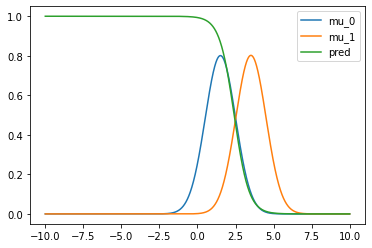

In [209]:
x_scale = np.linspace(-10, 10, 5000)
predictor = []
for line in x_scale:
    x = np.array(line)
    predictor.append(l1(x))
predictor = np.array(predictor)
predictor.reshape(5000,1)
h = mu_0[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu0_pdf = stats.norm.pdf(x_scale, hmean, hstd)
plt.plot(x_scale, mu0_pdf*2, label='mu_0')
h = mu_1[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu1_pdf = stats.norm.pdf(x_scale, hmean, hstd) 
plt.plot(x_scale,  mu1_pdf*2, label='mu_1')
plt.plot(x_scale, predictor.flatten() , label='pred')
plt.legend()